In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import os

In [3]:
base_dir=r'/home/nehamalcom/Python Projects/Mask Detector Project'
train_dir=os.path.join(base_dir,'dataset')
mask_dir=os.path.join(train_dir,'with_mask')
without_mask_dir=os.path.join(train_dir,'without_mask')
test_dir=os.path.join(base_dir,'test')

In [4]:
train_dir

'/home/nehamalcom/Python Projects/Mask Detector Project/dataset'

In [5]:
mask_fnames=os.listdir(mask_dir)

In [6]:
without_mask_fnames=os.listdir(without_mask_dir)

In [7]:
print(len(mask_fnames),len(without_mask_fnames))

690 686


In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [9]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
nrows=4
ncols=4
pic_index=0

In [10]:
fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)
pic_index+=8
next_mask_pix=[os.path.join(mask_dir,fname)
              for fname in mask_fnames[pic_index-8:pic_index]
              ]
next_wmask_pix=[os.path.join(without_mask_dir,fname)
               for fname in without_mask_fnames[pic_index-8:pic_index]
               ]

<Figure size 1152x1152 with 0 Axes>

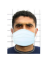

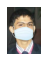

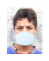

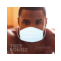

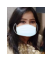

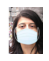

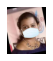

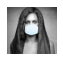

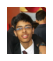

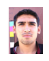

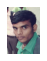

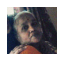

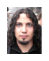

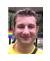

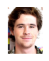

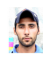

In [11]:
for i,img_path in enumerate(next_mask_pix+next_wmask_pix):
    sp=plt.subplot(nrows,ncols,i+1)
    sp.axis('Off')
    img=mpimg.imread(img_path)
    plt.imshow(img)
    
    plt.show()

In [12]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

In [13]:
data=[]
labels=[]

In [14]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [15]:
for fnames in mask_fnames:
    path=r'/home/nehamalcom/Python Projects/Mask Detector Project/dataset/with_mask'
    path=path+'//'+fnames
    image=load_img(path,target_size=(150,150))
    image=img_to_array(image)
    image=preprocess_input(image)
    data.append(image)
    labels.append(1)
for fnames in without_mask_fnames:
    path=r'/home/nehamalcom/Python Projects/Mask Detector Project/dataset/without_mask'
    path=path+'//'+fnames
    image=load_img(path,target_size=(150,150))
    image=img_to_array(image)
    image=preprocess_input(image)
    data.append(image)
    labels.append(0)

data=np.array(data,dtype="float32")
labels=np.array(labels)

In [16]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [17]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels)
print(data.shape,labels.shape)

(1376, 150, 150, 3) (1376, 2)


In [18]:
from sklearn.model_selection import train_test_split
(train_X,test_X,train_Y,test_Y)=train_test_split(data,labels,test_size=0.2,random_state=42)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( 
                                   rotation_range=40,
                                width_shift_range=.2,
                                height_shift_range=.2,
                                shear_range=.2,
                                zoom_range=.2,
                                fill_mode='nearest',
                                horizontal_flip=True
                                   
                                  )
test_datagen  = ImageDataGenerator(
                                  )
train_generator = train_datagen.flow(train_X,
                                     train_Y,
                                    batch_size=20,                                                  
                                                    )     
validation_generator =  test_datagen.flow(test_X,
                                          test_Y,
                                        batch_size=20,
                                       
                                          )

In [20]:
model = tf.keras.models.Sequential([
        tf.keras.layers. AveragePooling2D((5,5),input_shape=(150,150,3)),
        
    
    
        tf.keras.layers.Flatten(),
        
        tf.keras.layers.Dense(128,activation='relu'),
        
        tf.keras.layers.Dropout(0.5),
    
        tf.keras.layers.Dense(2,activation='softmax')
    
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
average_pooling2d (AveragePo (None, 30, 30, 3)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2700)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               345728    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 345,986
Trainable params: 345,986
Non-trainable params: 0
_________________________________________________________________


In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0001,epsilon=1e-05),metrics=['accuracy'])

class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            if logs.get('accuracy')>0.90:
                print('We have reached 90% accuracy so stopping training!')
                self.model.stop_training=True

In [23]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [24]:
callbacks=myCallback()
history=model.fit(train_generator,
                 epochs=20,
                  
                 validation_data=validation_generator,
                    callbacks=[callbacks])

Epoch 1/20
55/55 [==============================] - 9s 156ms/step - loss: 0.7380 - accuracy: 0.6427 - val_loss: 0.3587 - val_accuracy: 0.8478
Epoch 2/20
55/55 [==============================] - 8s 143ms/step - loss: 0.5479 - accuracy: 0.7436 - val_loss: 0.3115 - val_accuracy: 0.8804
Epoch 3/20
55/55 [==============================] - 8s 141ms/step - loss: 0.5100 - accuracy: 0.7691 - val_loss: 0.2556 - val_accuracy: 0.9022
Epoch 4/20
55/55 [==============================] - 8s 144ms/step - loss: 0.4797 - accuracy: 0.7709 - val_loss: 0.2466 - val_accuracy: 0.9167
Epoch 5/20
55/55 [==============================] - 10s 178ms/step - loss: 0.4657 - accuracy: 0.7909 - val_loss: 0.2216 - val_accuracy: 0.9203
Epoch 6/20
55/55 [==============================] - 8s 142ms/step - loss: 0.4488 - accuracy: 0.7873 - val_loss: 0.2237 - val_accuracy: 0.9167
Epoch 7/20
55/55 [==============================] - 8s 150ms/step - loss: 0.4109 - accuracy: 0.8109 - val_loss: 0.1986 - val_accuracy: 0.9239
Epoch

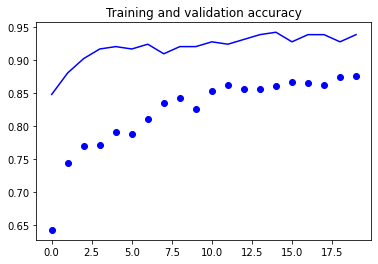

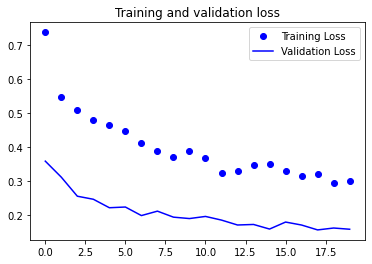

In [25]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')

plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
from tensorflow.keras.preprocessing import image
import numpy as np

path=r'/home/nehamalcom/Python Projects/Mask Detector Project/examples/girlnomask.jpg'
    
image = load_img(path, target_size=(150, 150))
image = img_to_array(image)
image = preprocess_input(image)

image = np.expand_dims(image, axis=0)
image = np.vstack([image])

classes = model.predict(image)
classes



array([[0.97085875, 0.02914128]], dtype=float32)

In [ ]:
import cv2
labels_dict={1:'without_mask',0:'with_mask'}
color_dict={1:(0,0,255),0:(0,255,0)}

size = 4
webcam = cv2.VideoCapture(0) #Use camera 0


classifier = cv2.CascadeClassifier(r'C:\Users\shive\OneDrive\Desktop\haarcascade_frontalface_default.xml')

while True:
    (rval, im) = webcam.read()
    im=cv2.flip(im,1,1) 

    
    mini = cv2.resize(im, (im.shape[1] // size, im.shape[0] // size))

    
    faces = classifier.detectMultiScale(mini)

    
    for f in faces:
        (x, y, w, h) = [v * size for v in f]
        
        face_img = im[y:y+h, x:x+w]
        resized=cv2.resize(face_img,(150,150))
        image= preprocess_input(resized)
        reshaped=np.expand_dims(image, axis=0)
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)
        #print(result)
        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(im, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    
    cv2.imshow('LIVE',   im)
    key = cv2.waitKey(10)
    
    if key == 27: #esc
        break

webcam.release()


cv2.destroyAllWindows()